In [ ]:
from ST_alpha_env import ST_alpha_env, ST_alpha_env_Telescoping
from ShortTermalpha import ShortTermalpha
from A2C import A2CAgent
import numpy as np
import torch
import os
import matplotlib.pyplot as plt

short_term_alpha = ShortTermalpha(zeta=0.5, epsilon=0.005, eta=0.001)

env = ST_alpha_env(
    ShortTermalpha=short_term_alpha,
    nu=0,
    T=60,
    POV=0.2,
    Nq=20,
    S_0=30,
    X_0=0,
    q_0=0,
    gamma=1,
    Delta=0.03,
    varphi=0.01,
    phi=0,
    sigma=0.01,
    reward_scale=1
)
tenv = ST_alpha_env_Telescoping(
    ShortTermalpha=short_term_alpha,
    nu=0,
    T=60,
    POV=0.2,
    Nq=20,
    S_0=30,
    X_0=0,
    q_0=0,
    gamma=1,
    Delta=0.01,
    varphi=0.01,
    phi=0,
    sigma=0.01,
    reward_scale=1
)
agent = A2CAgent(
    env=env,
    scheduler_gamma=0.99,
    sched_step_size=100,
    lr_actor=1e-4,
    lr_critic=1e-4,
    n_layers=6,
    n_nodes=128,
    entropy_coef=0.03,
    terminal_frac=0.4,
)

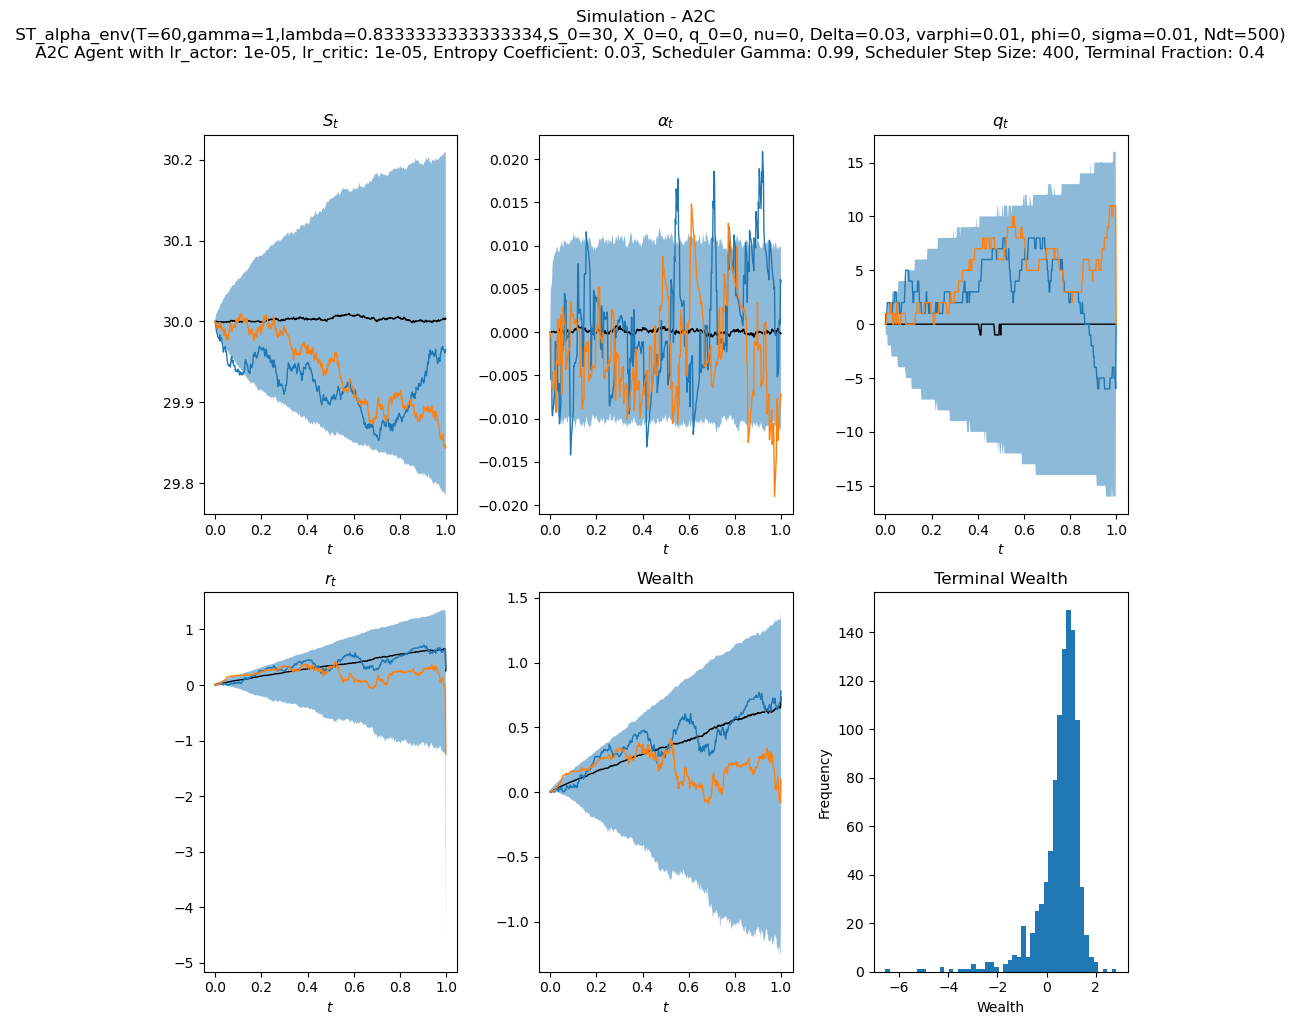

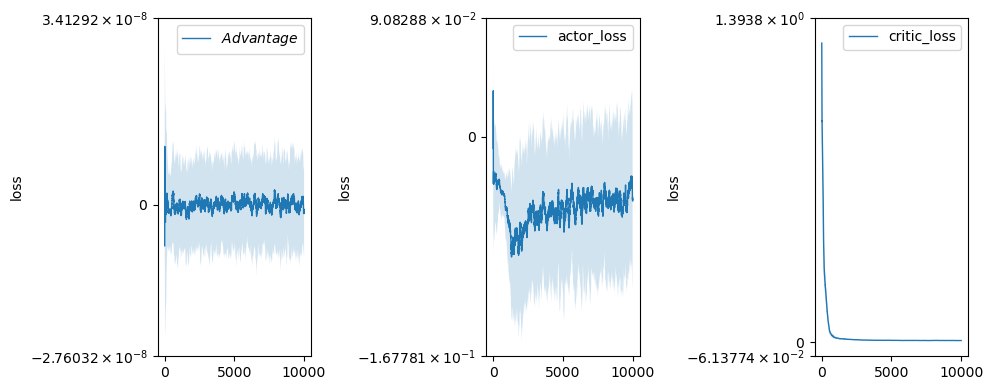

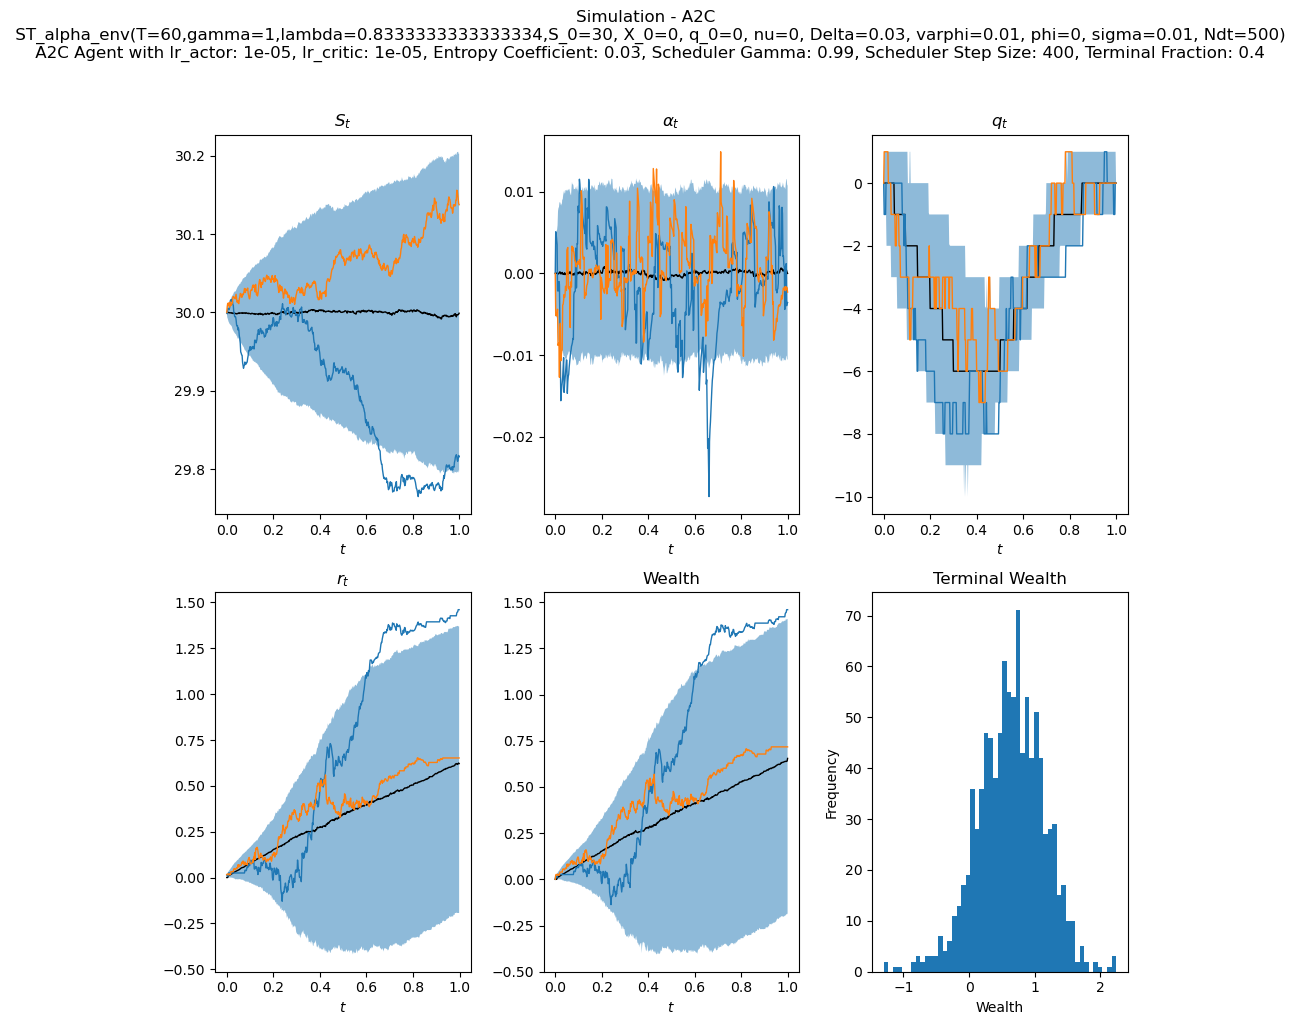

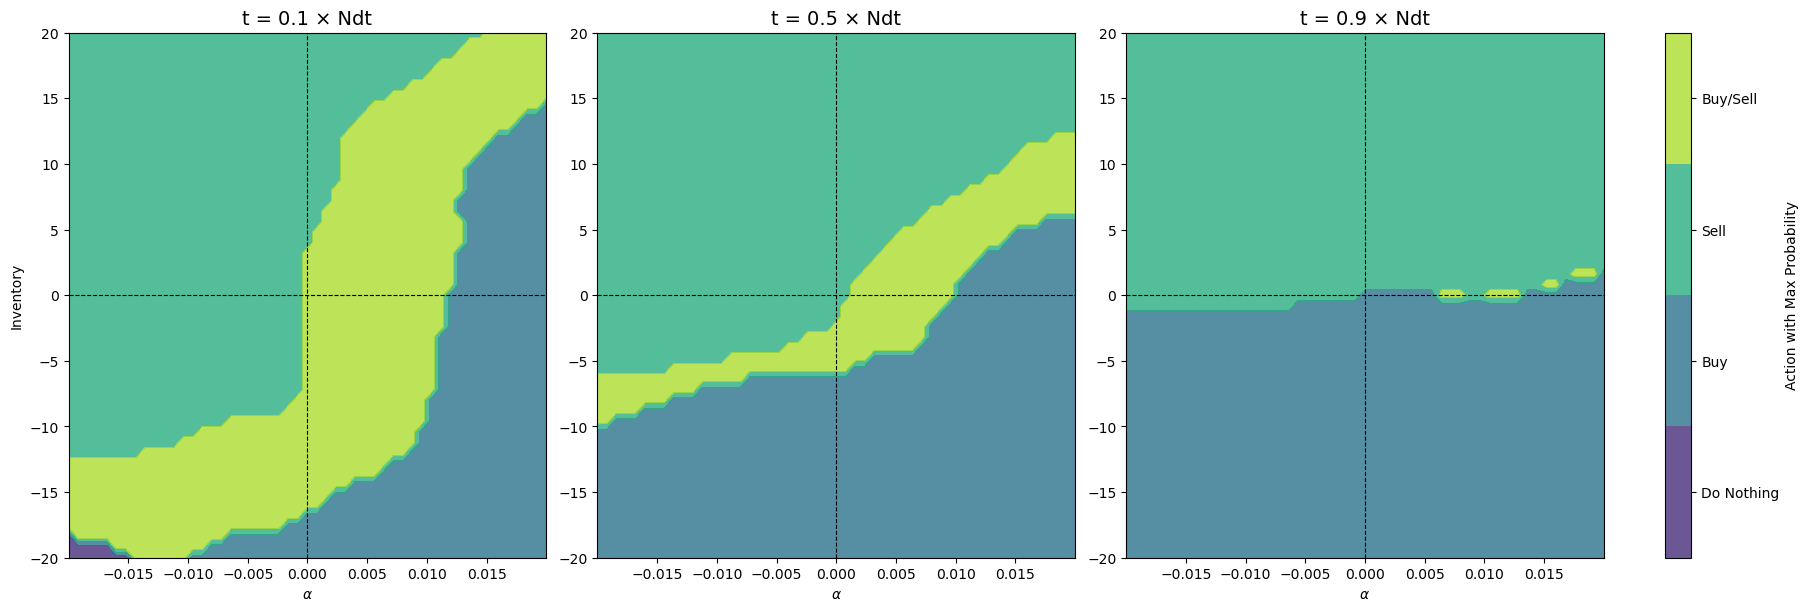

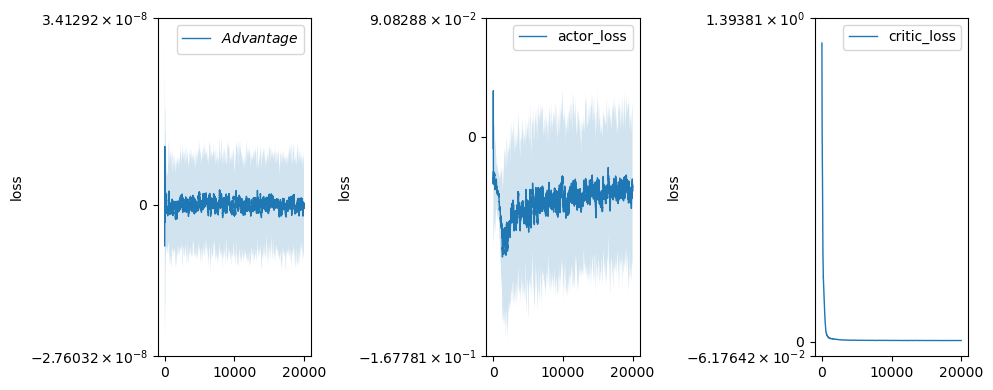

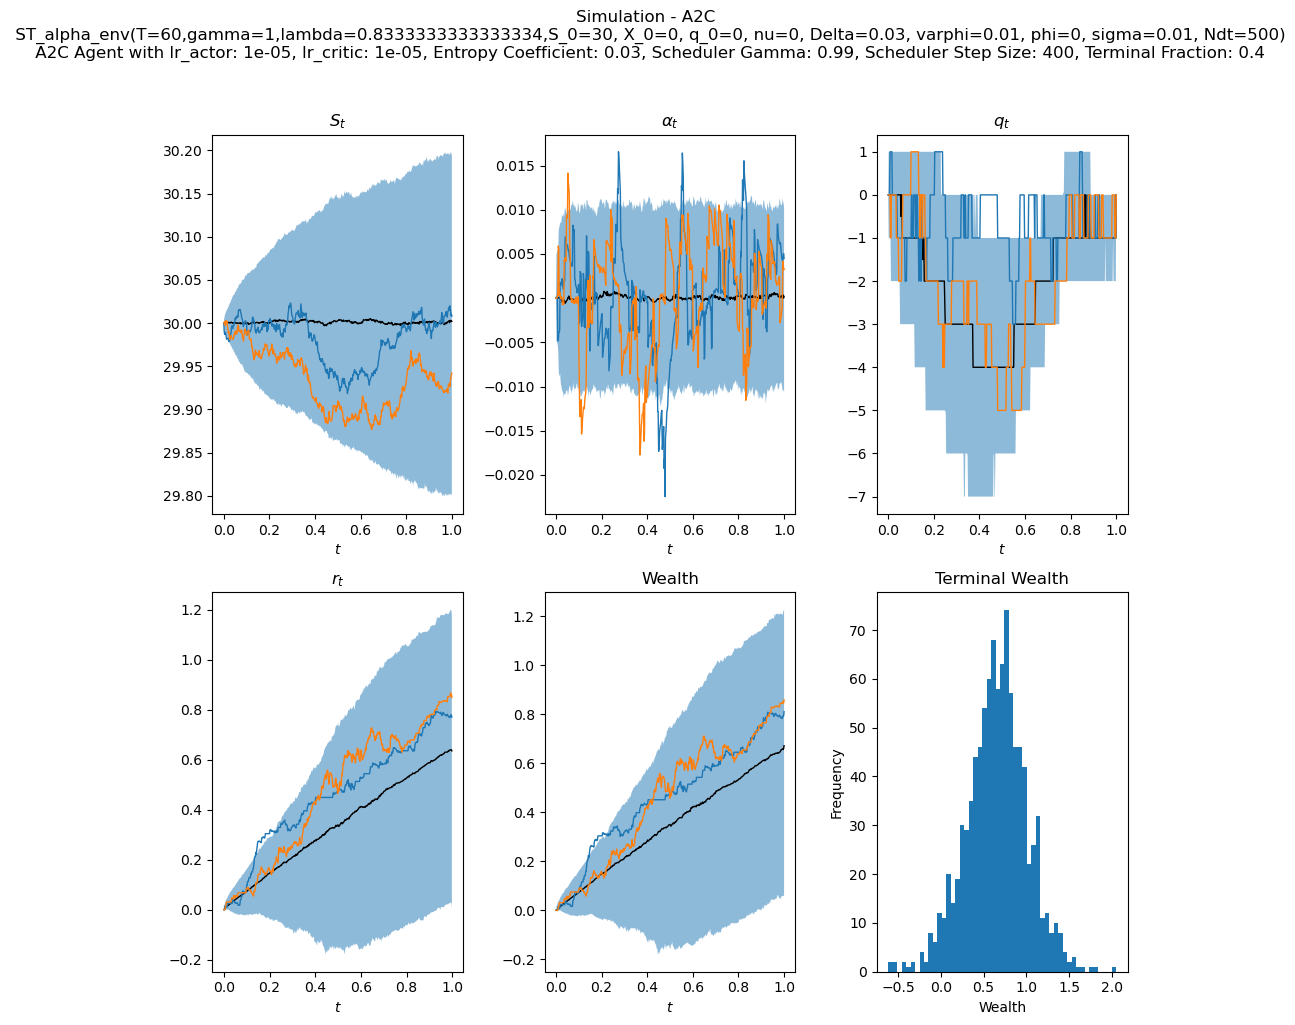

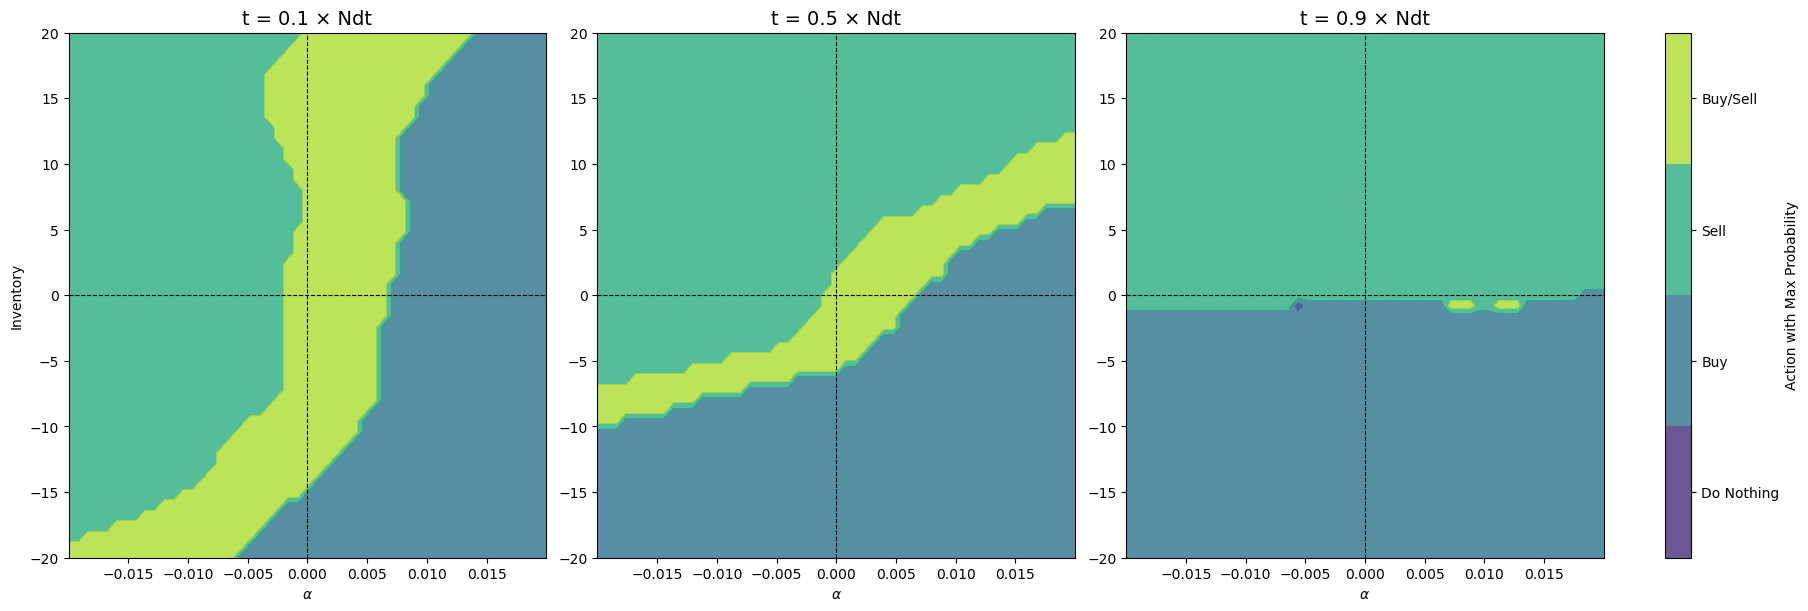

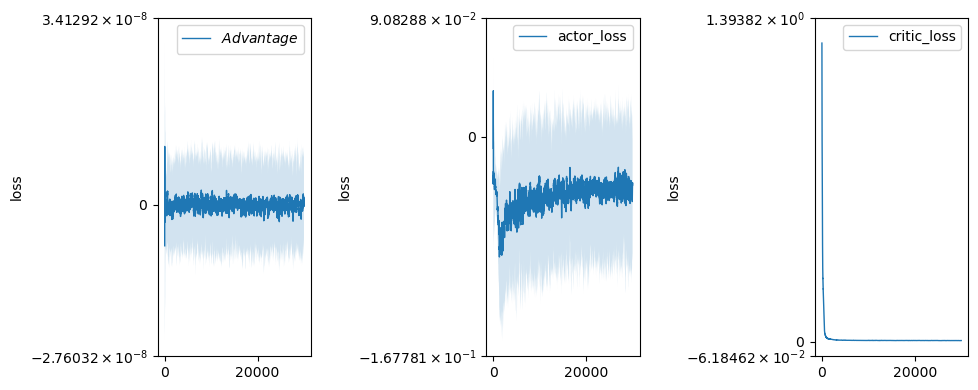

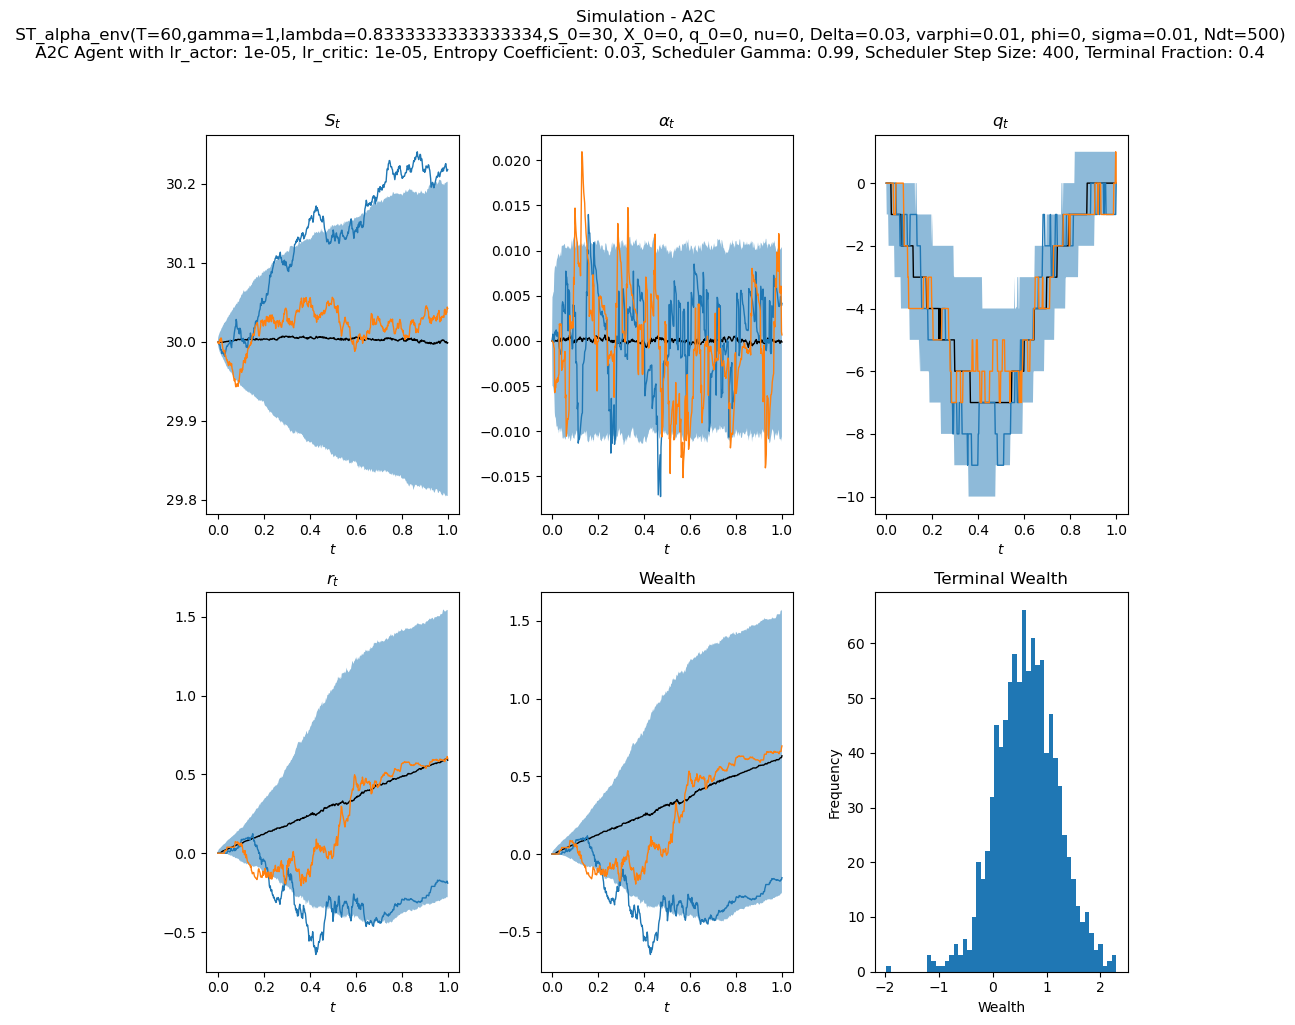

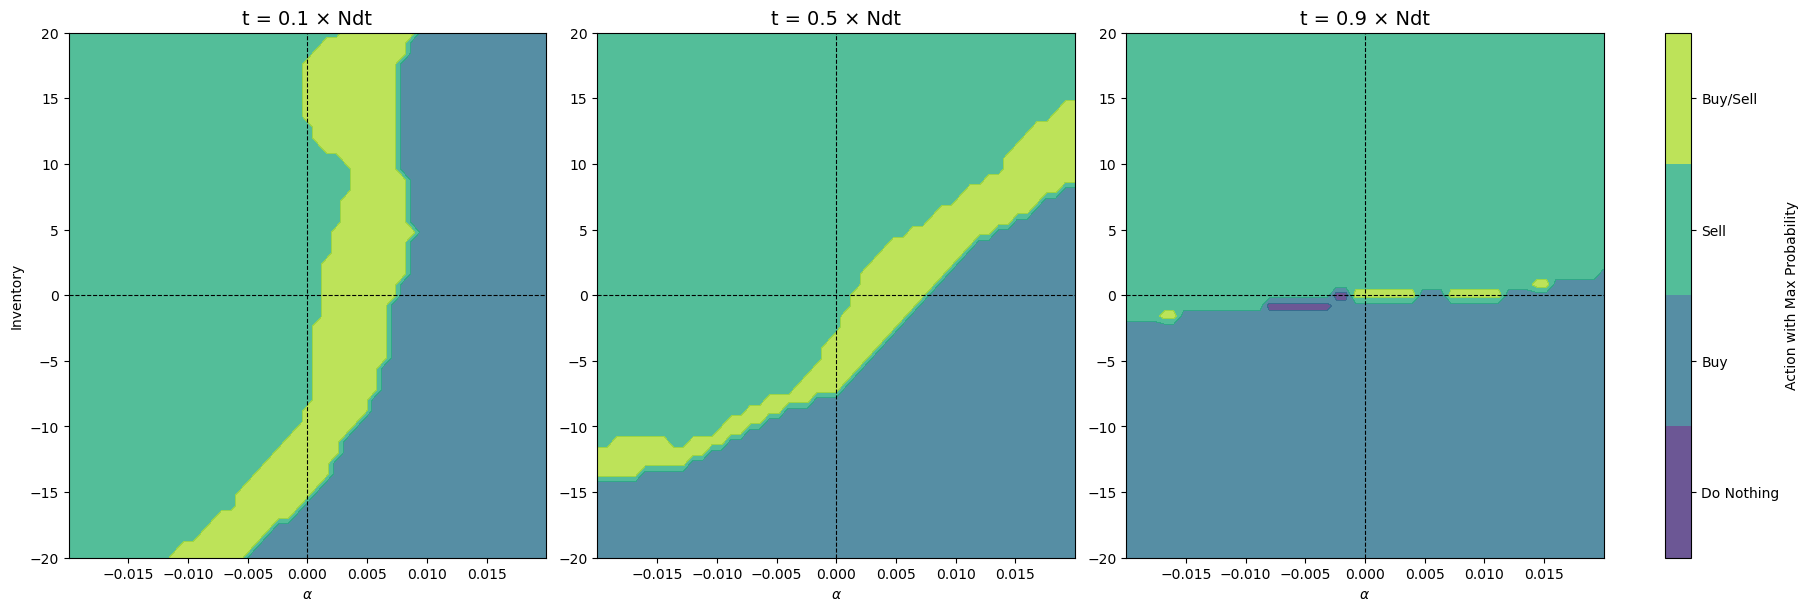

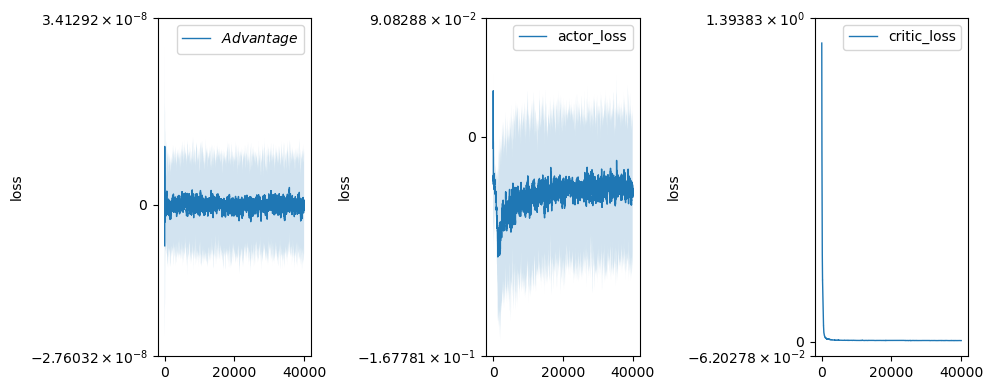

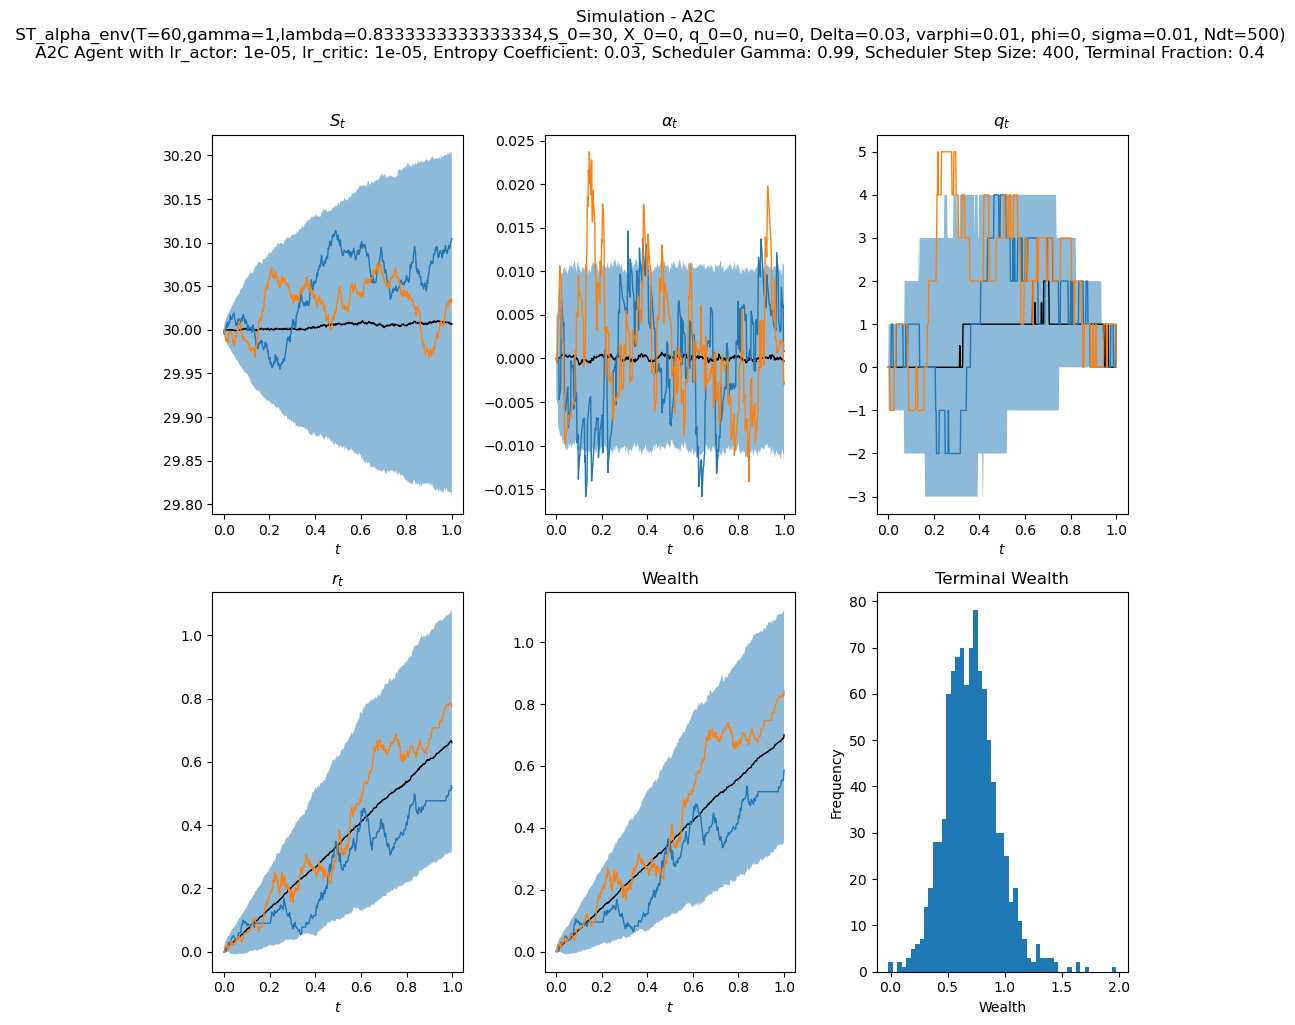

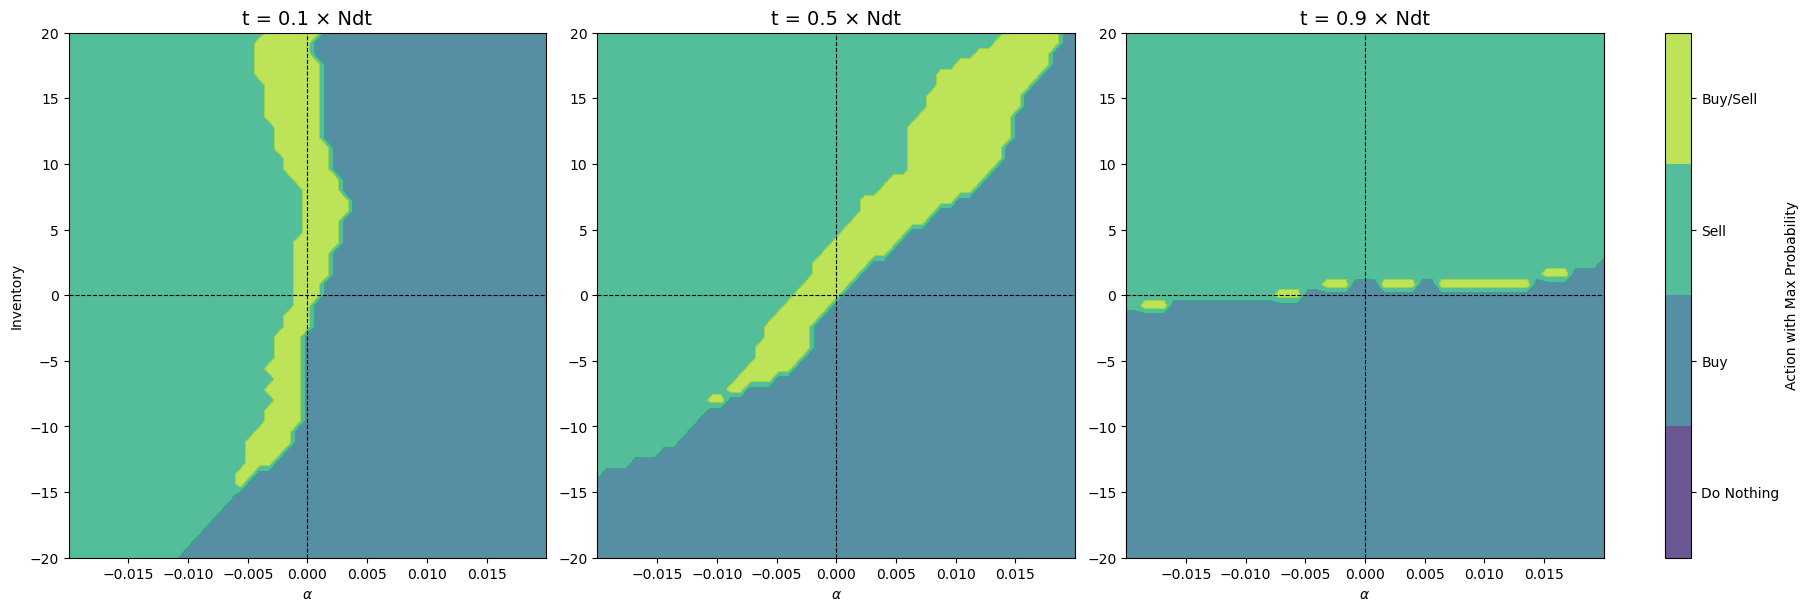

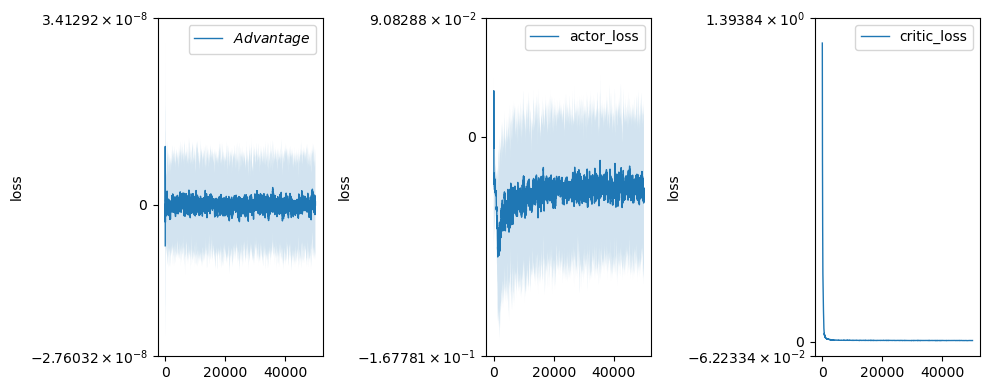

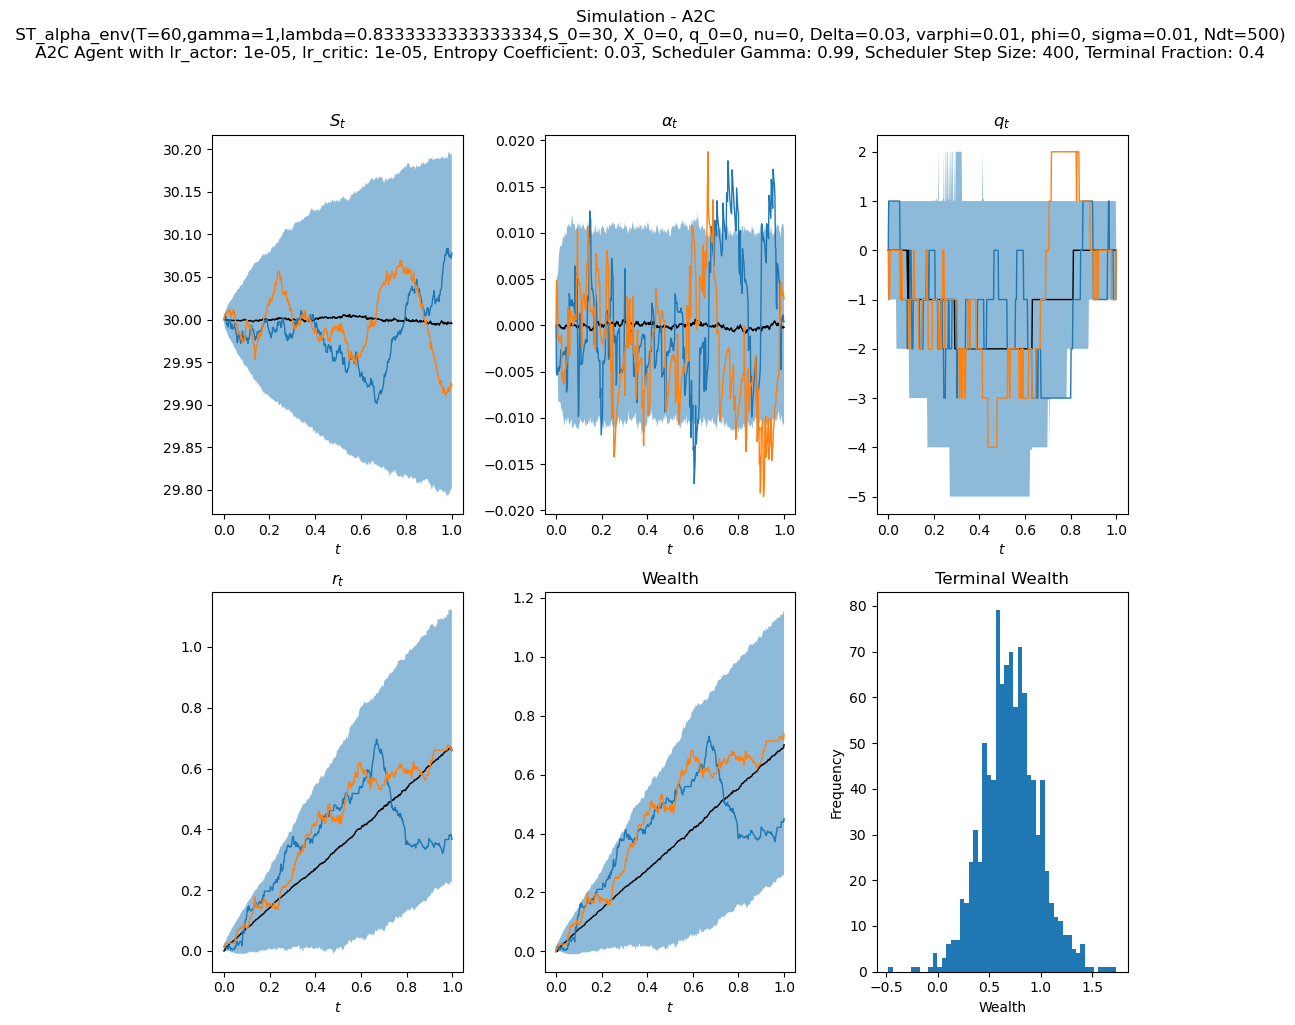

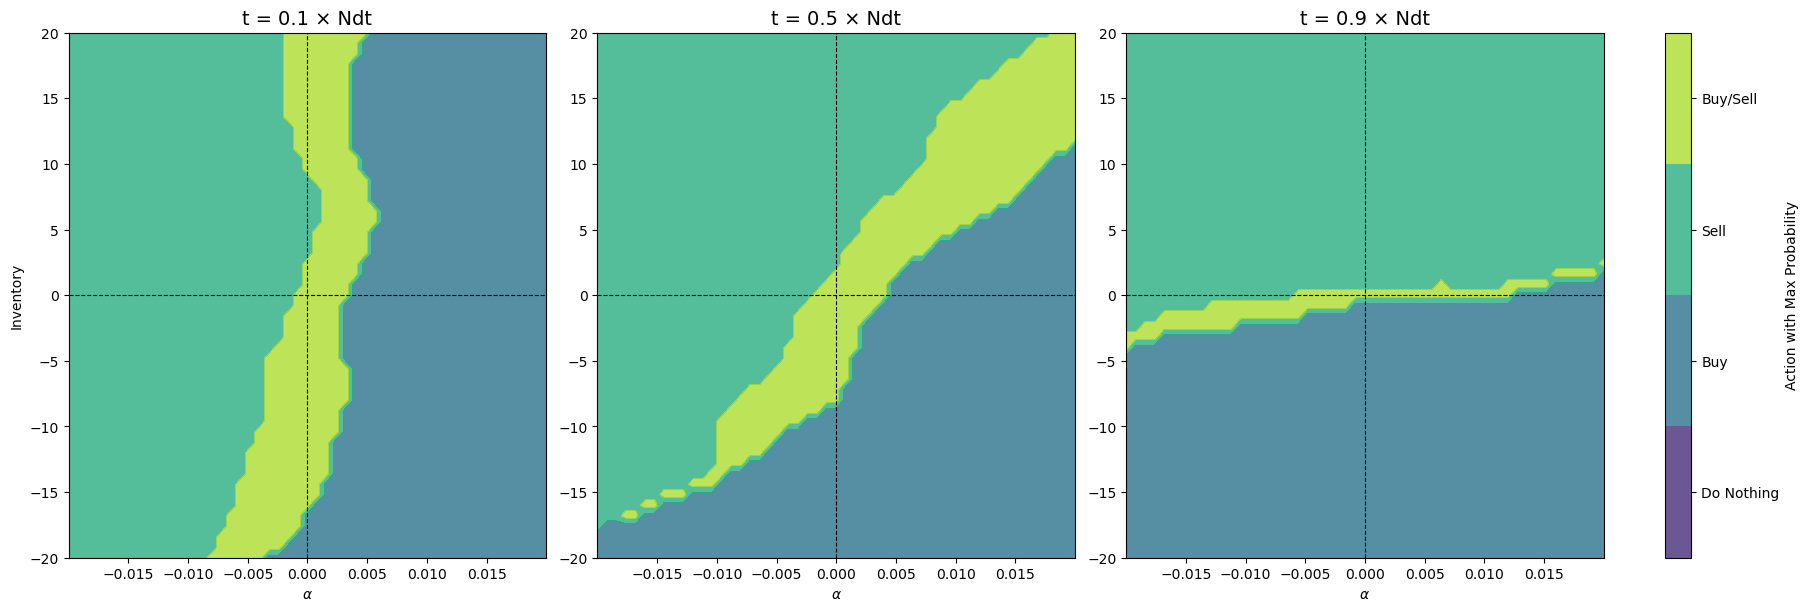

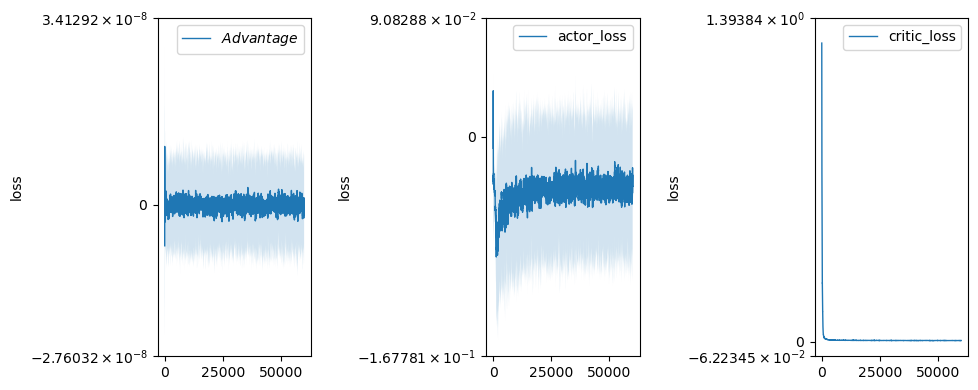

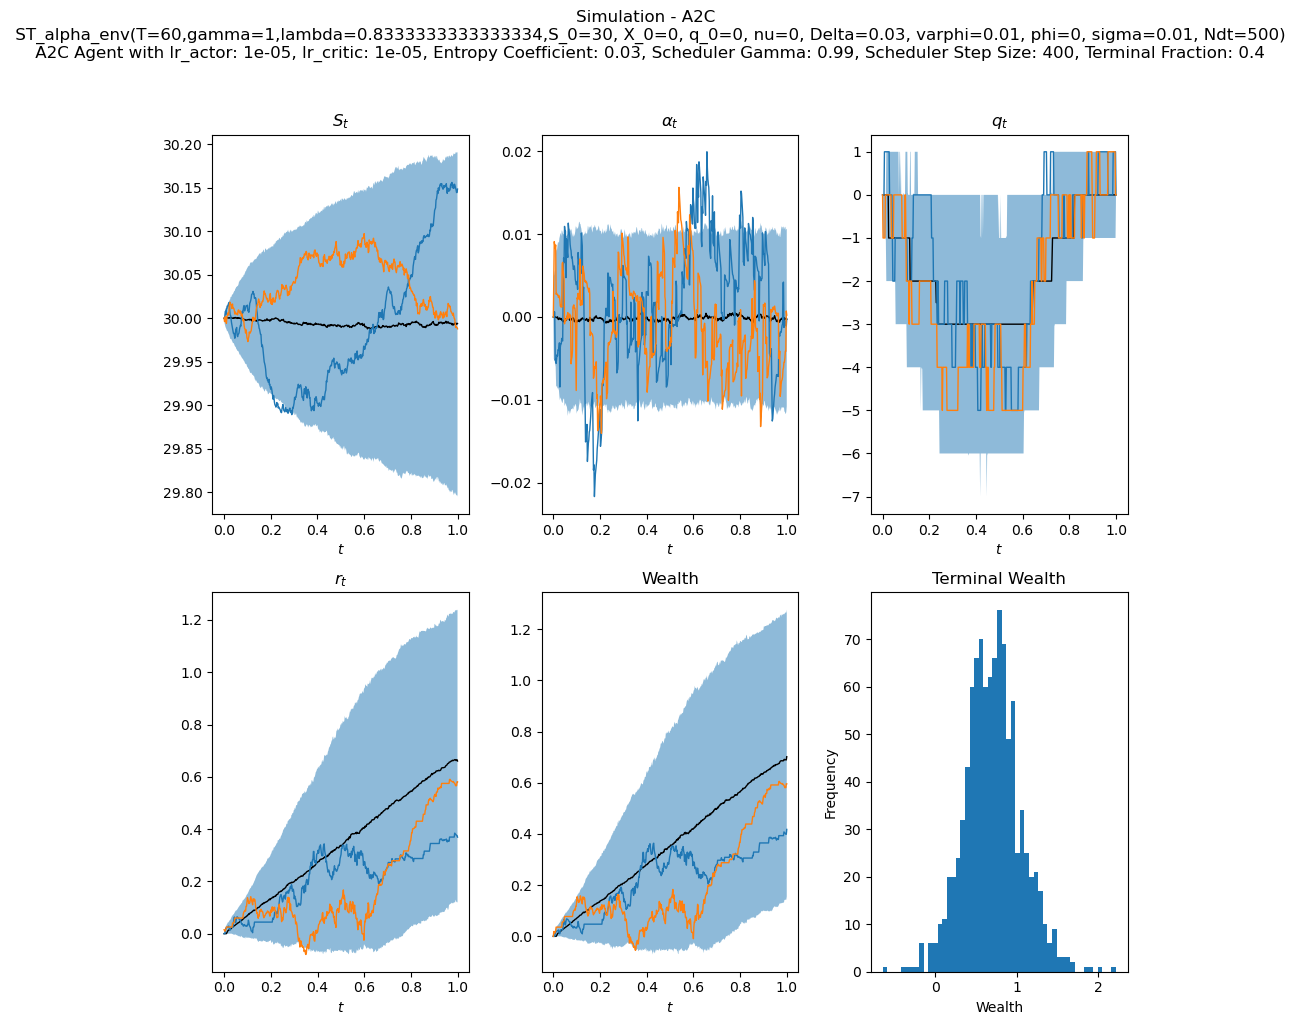

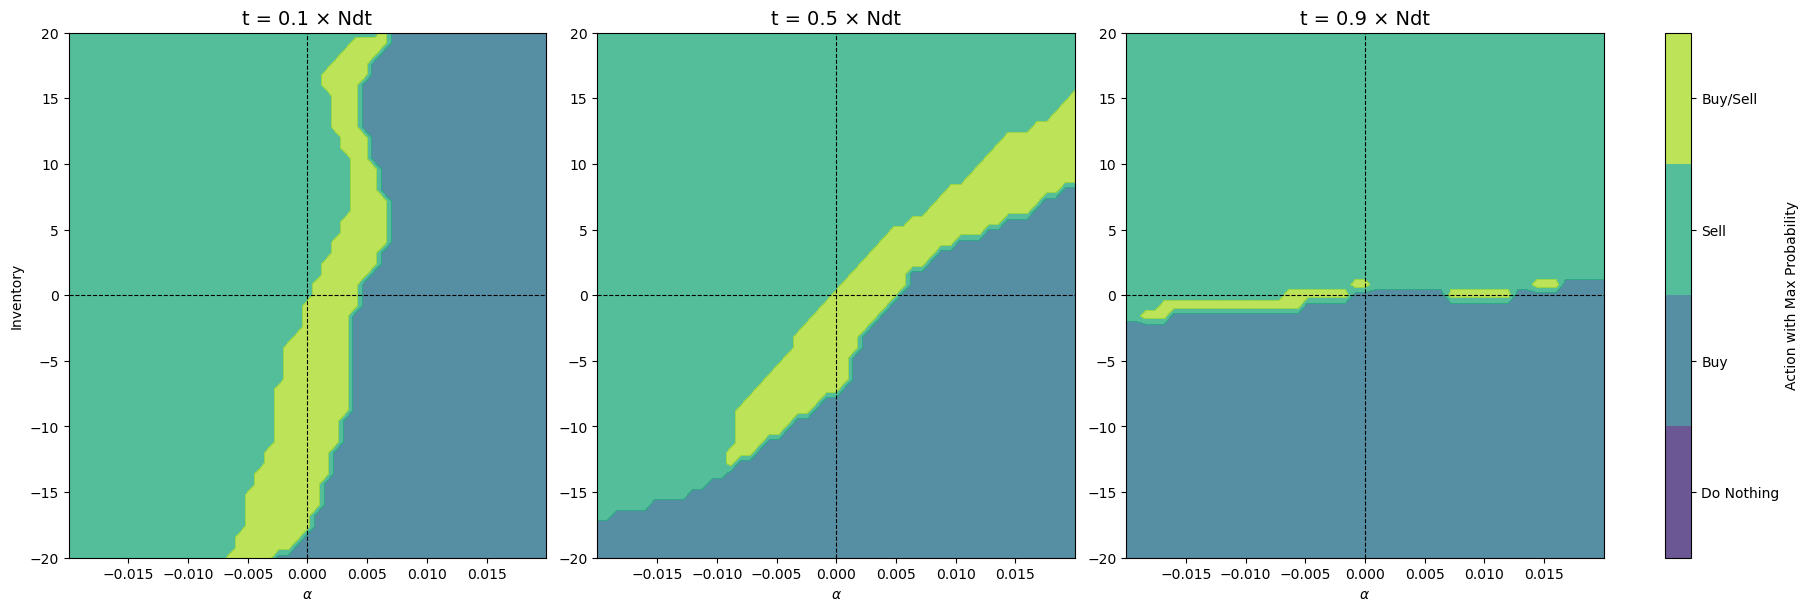

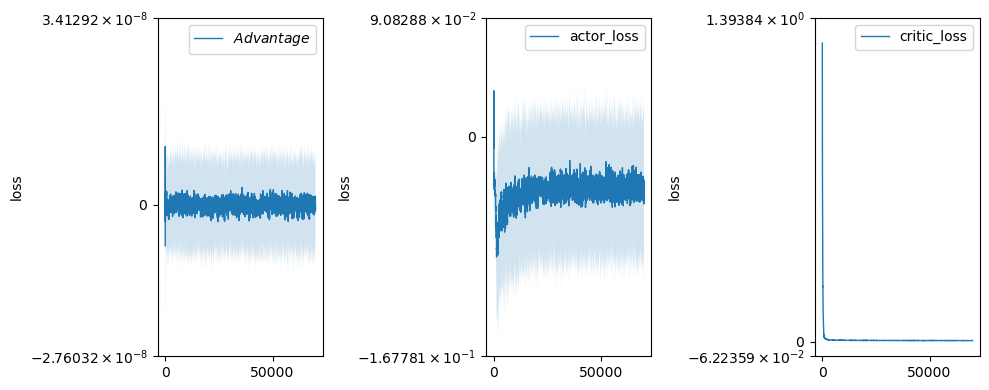

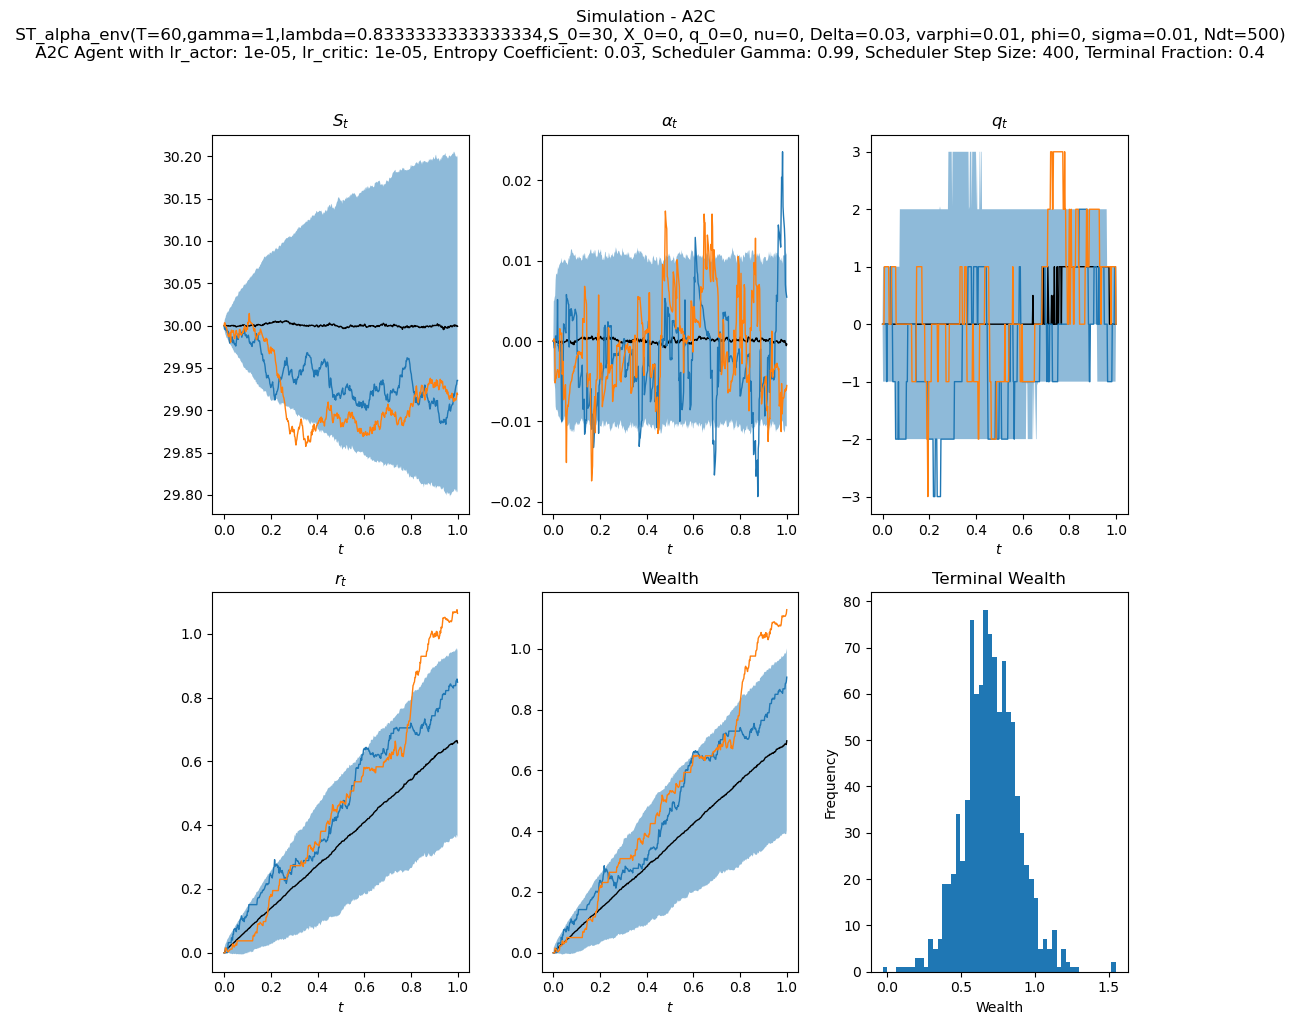

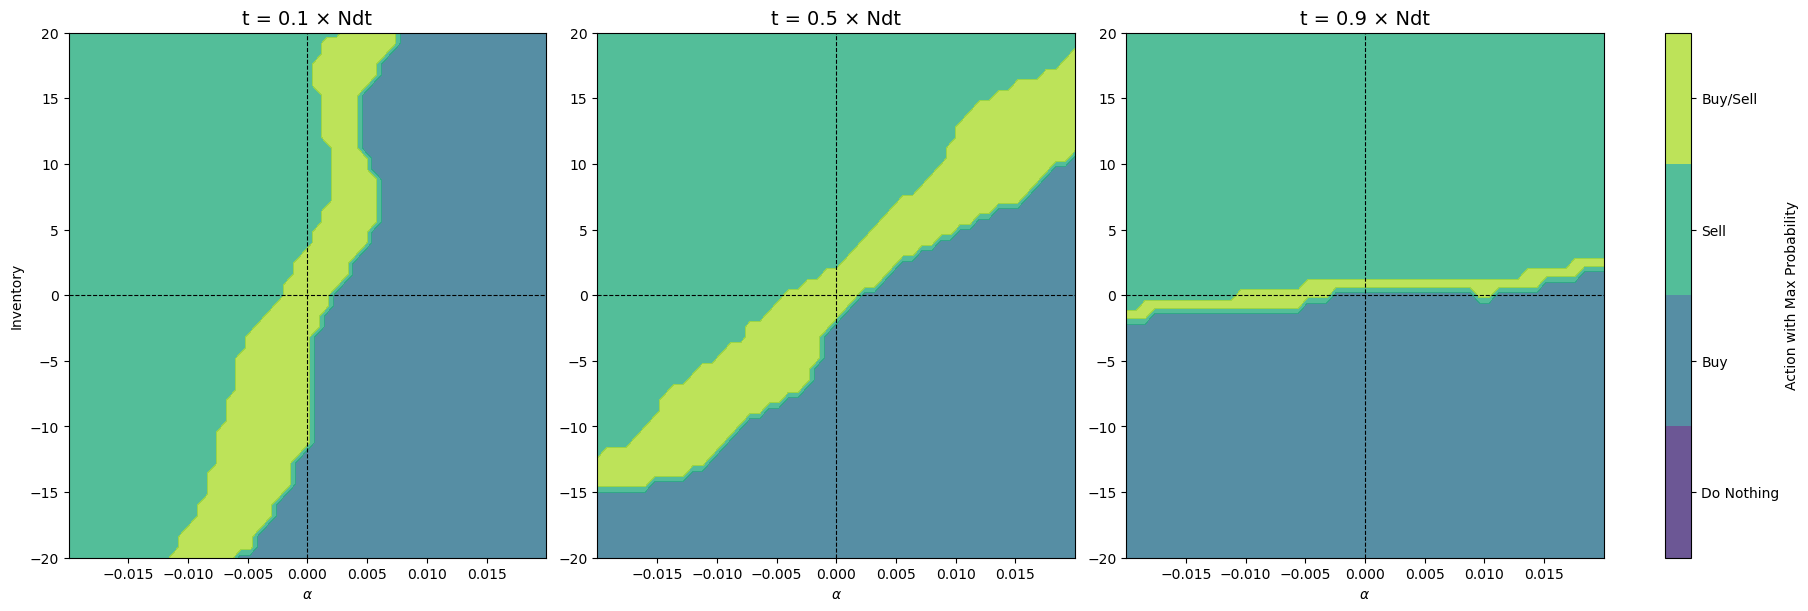

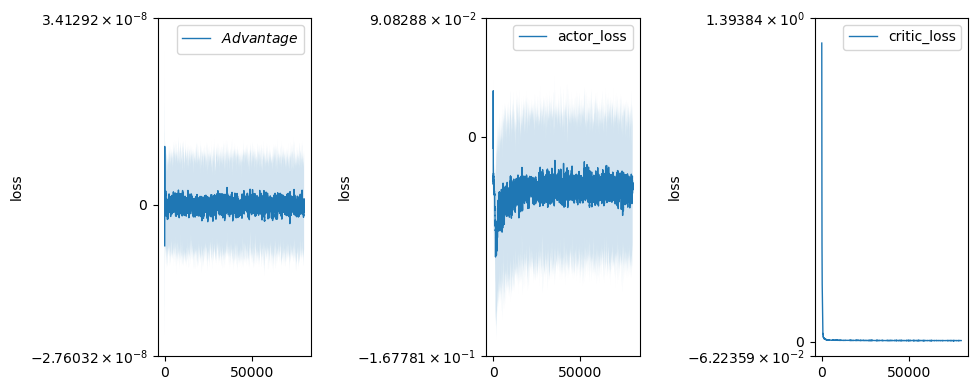

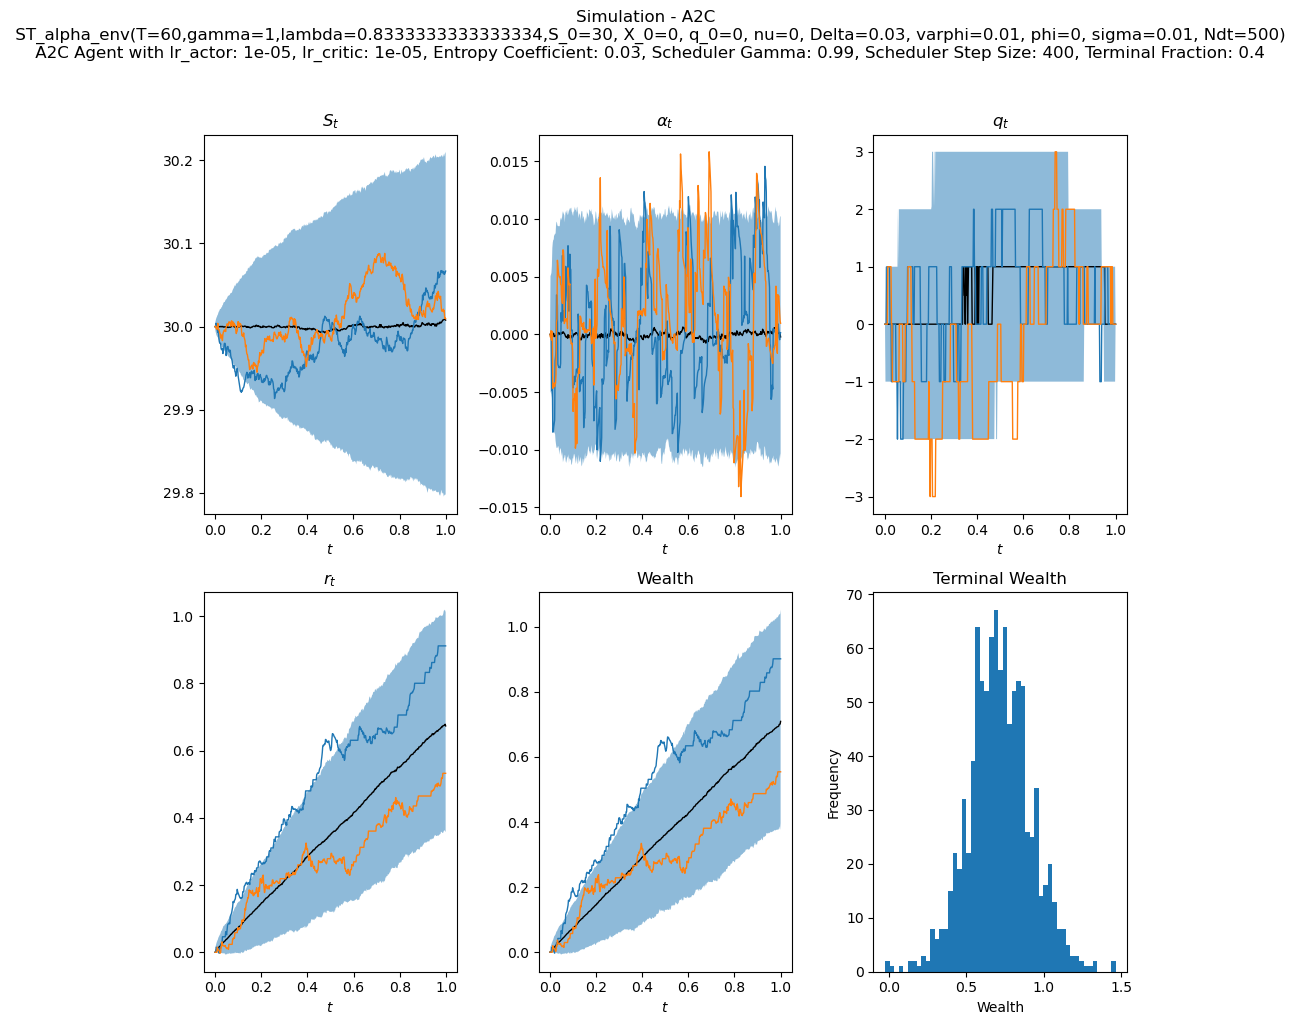

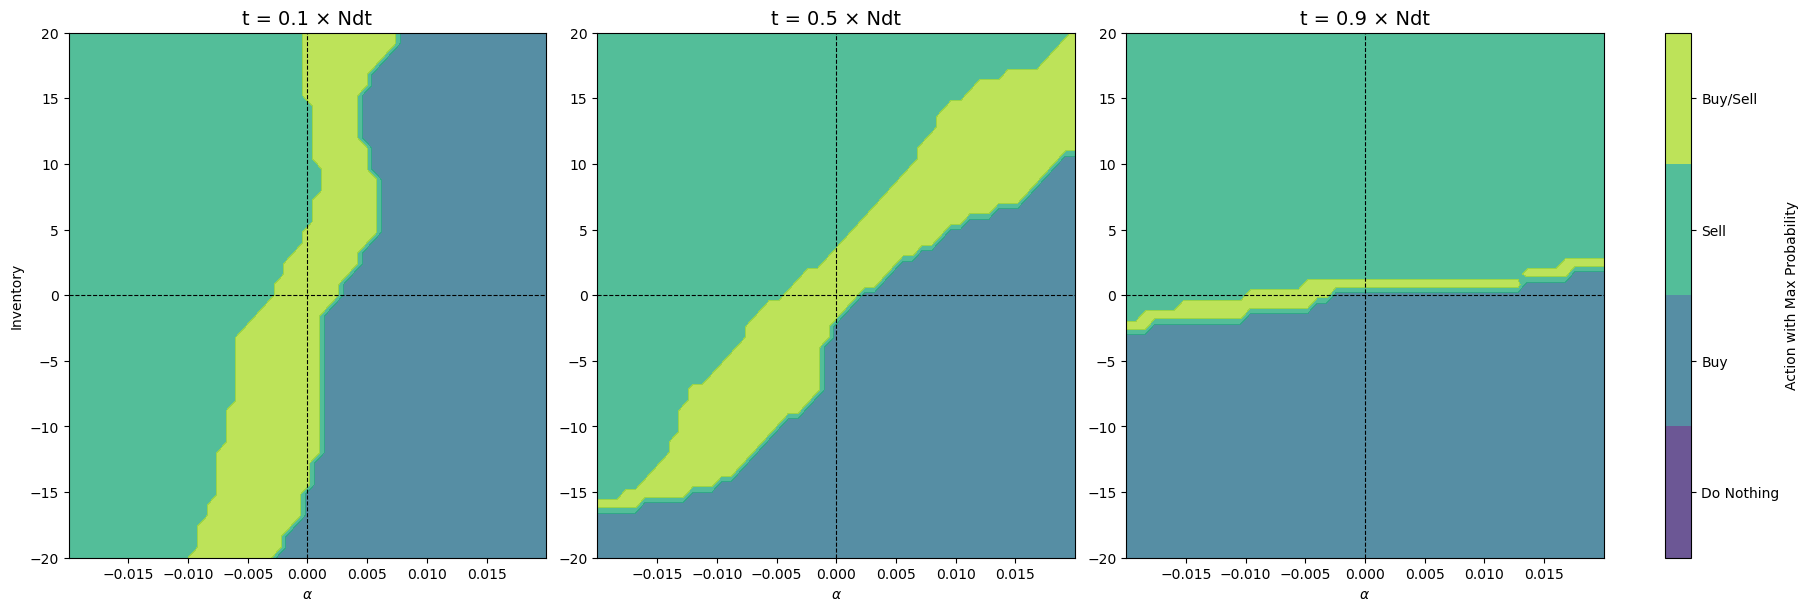

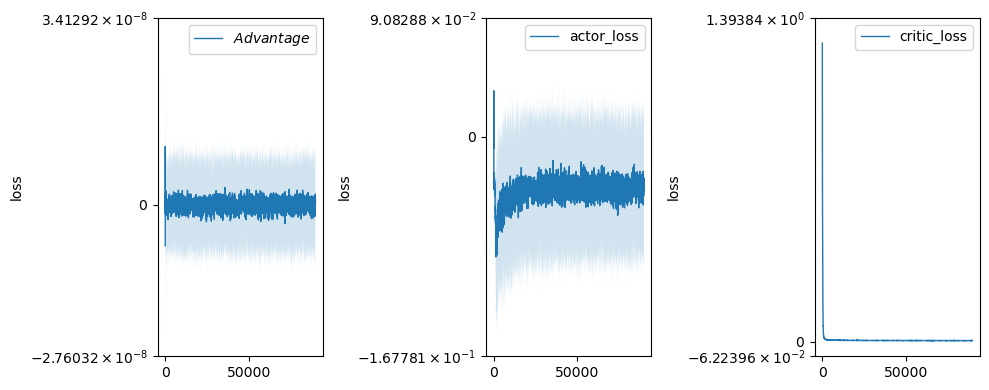

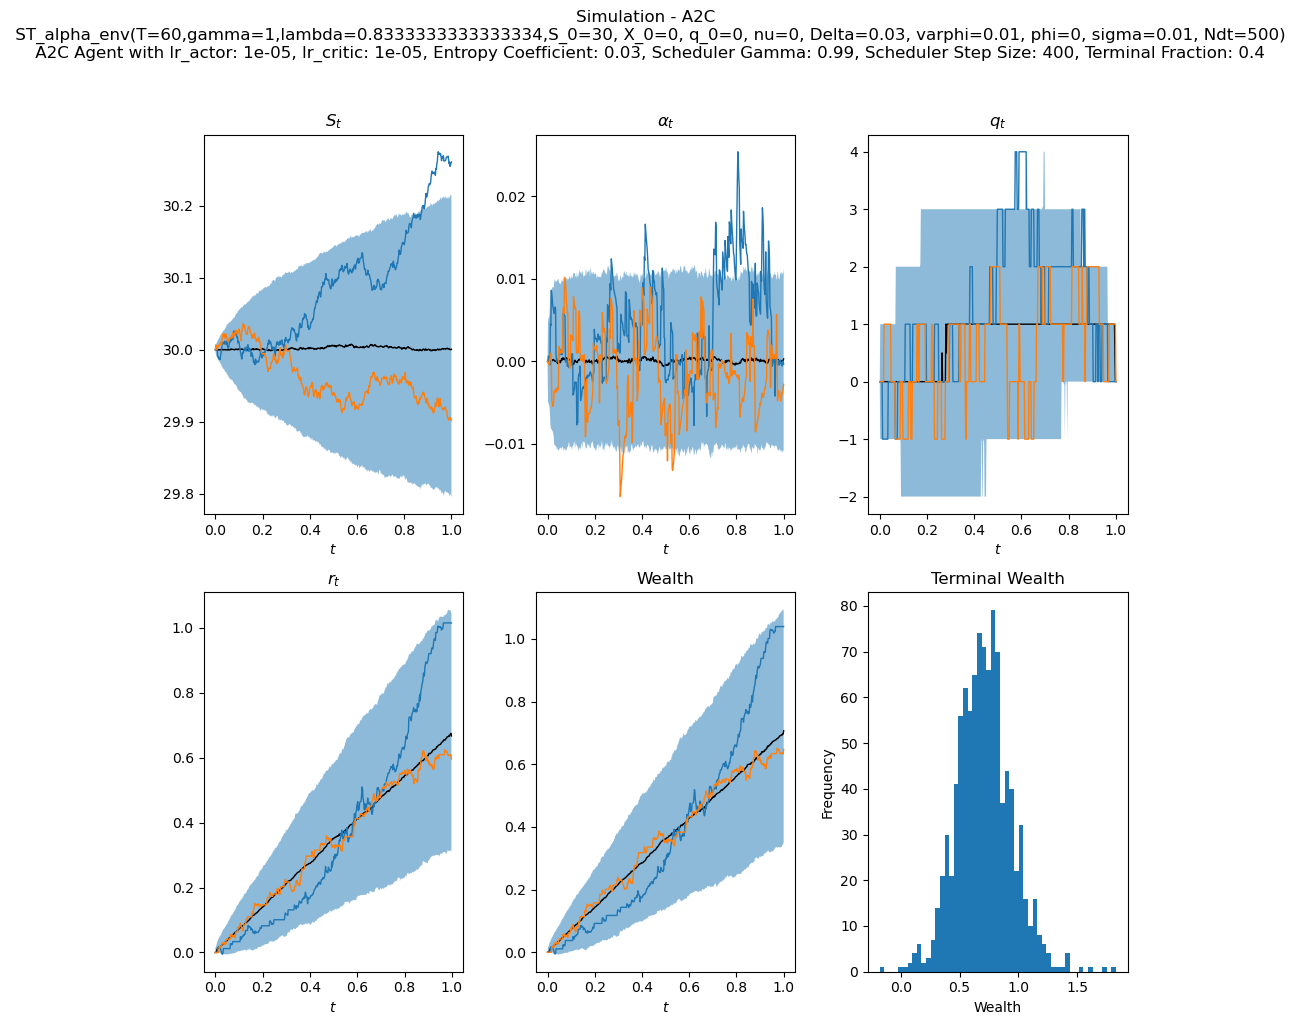

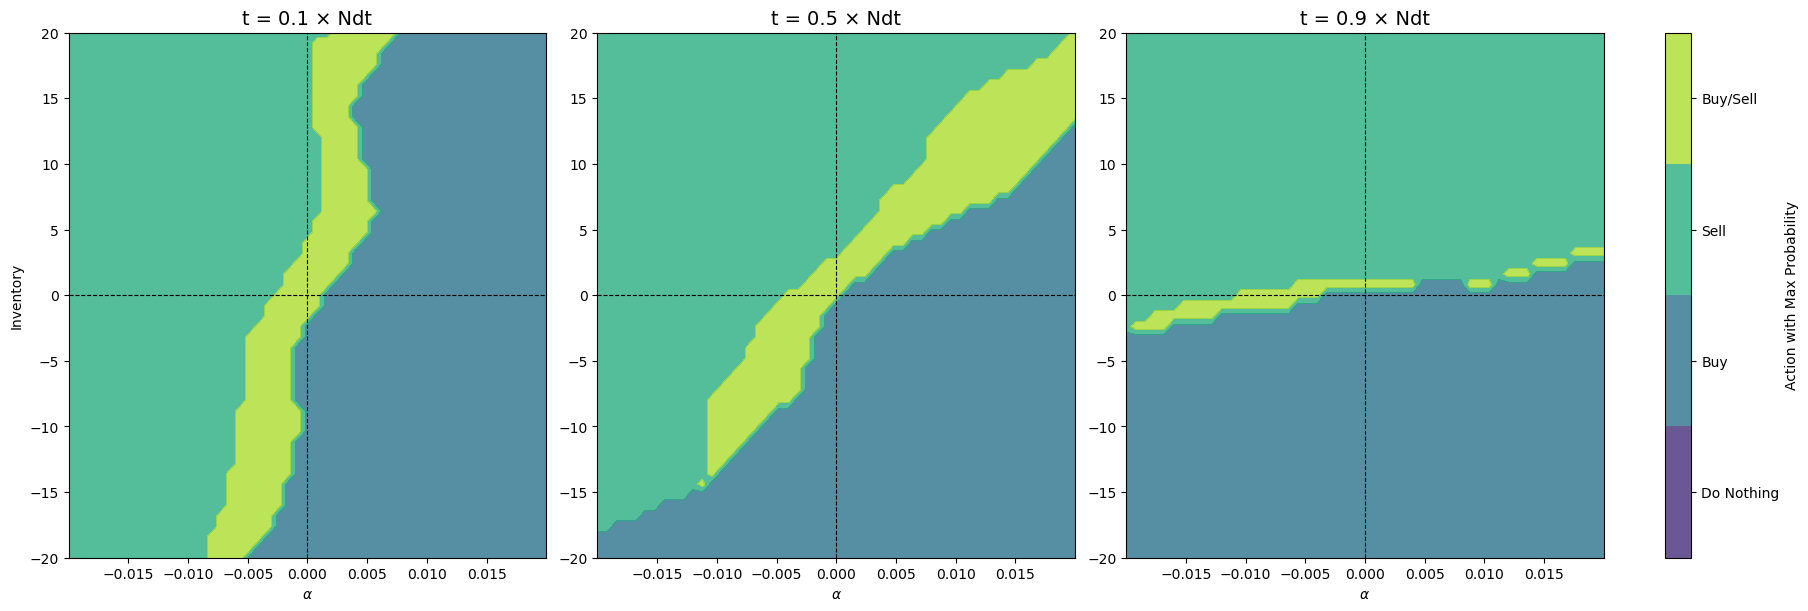

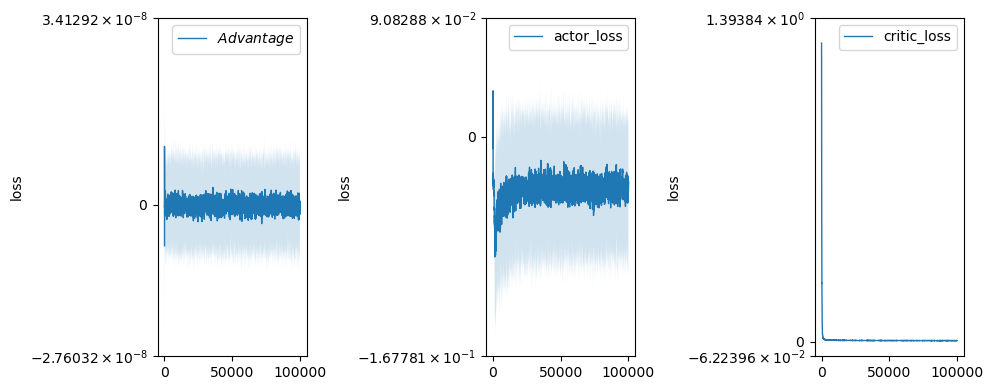

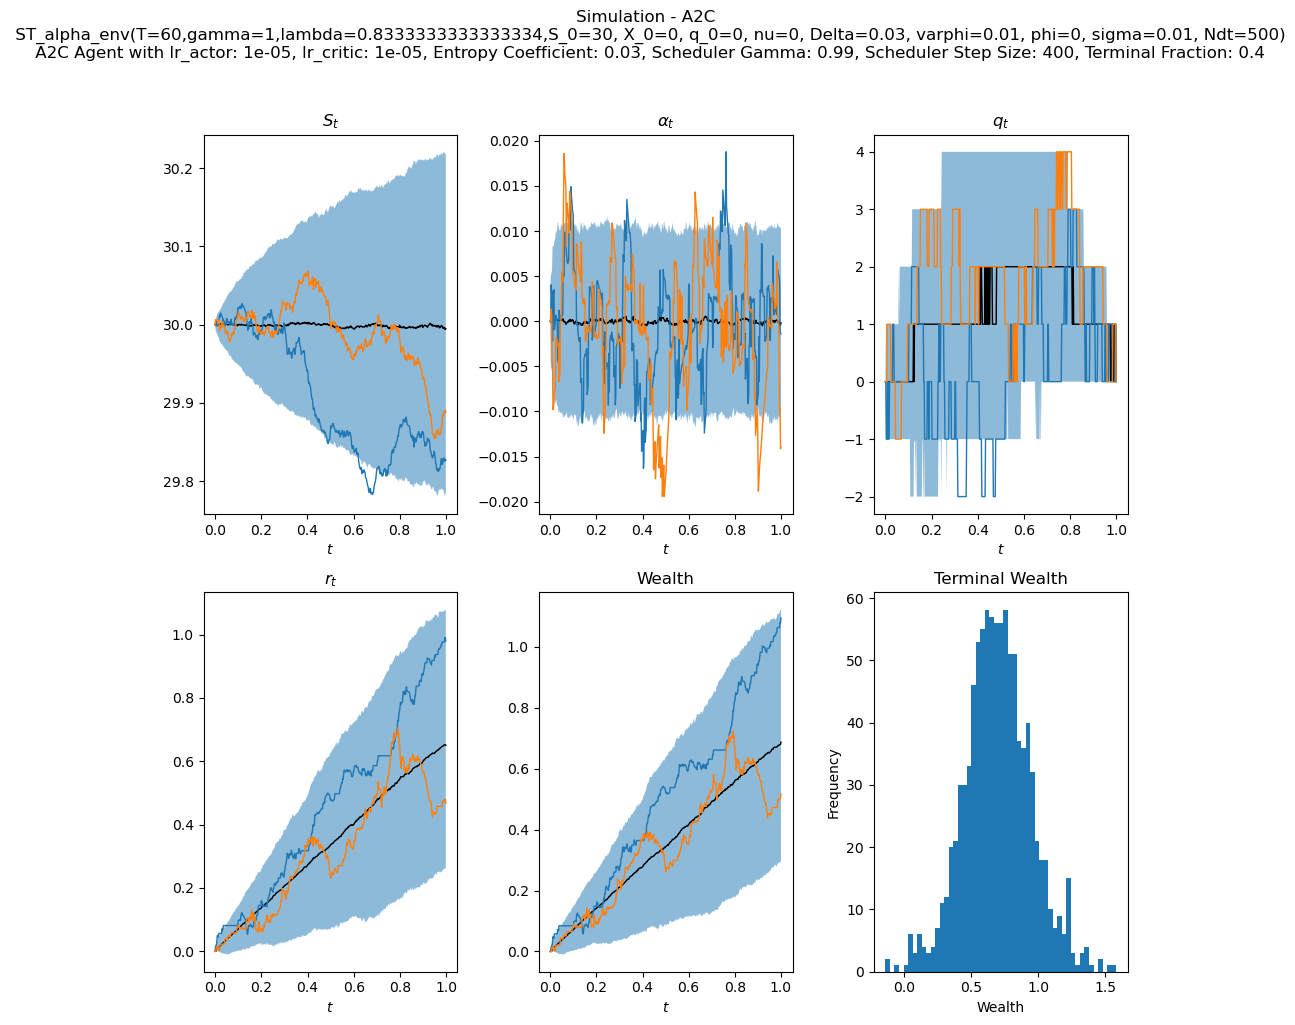

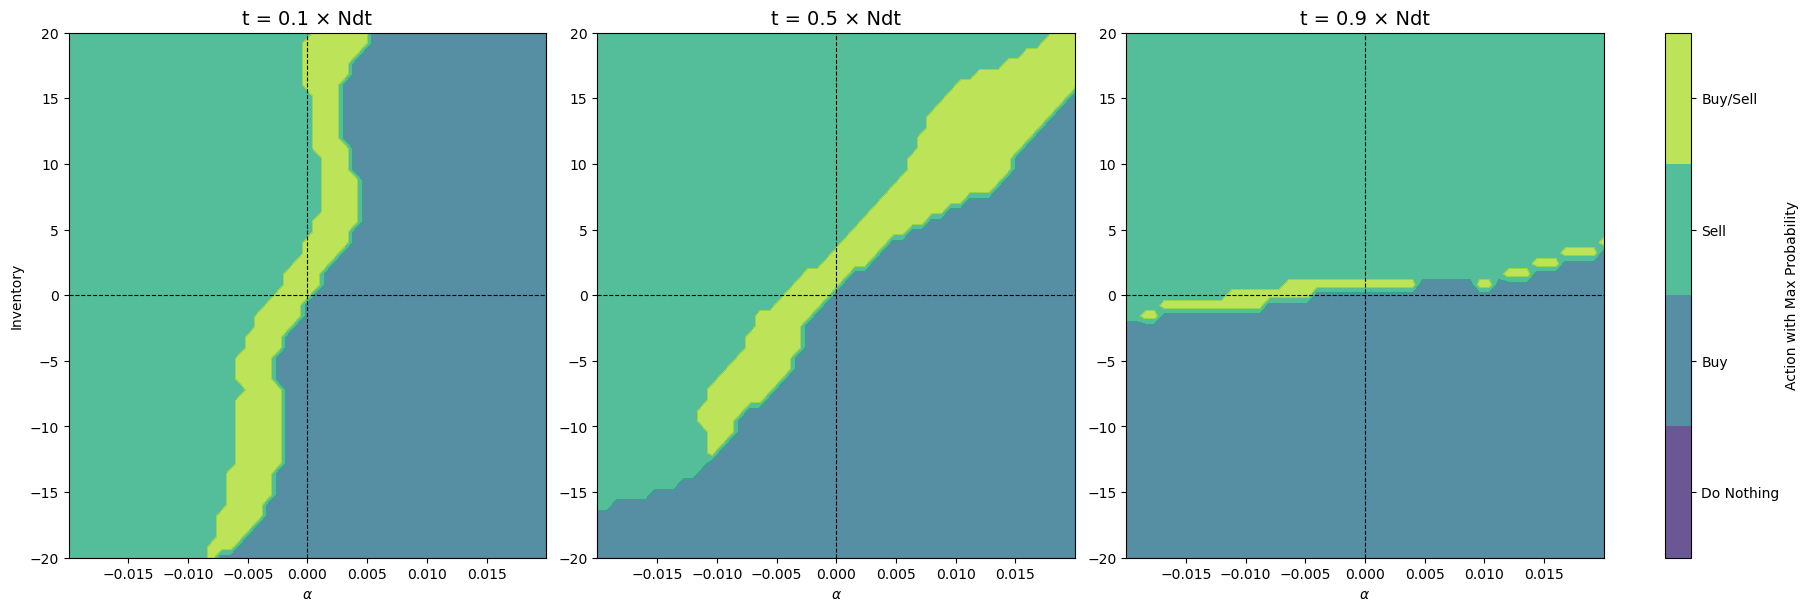

0

In [2]:
# agent.run_strategy(nsims= 1000)
agent.train(n_iter=20000, n_plot=2000, mini_batch_size=256, n_iter_net=5)
message = "ok"
os.system(f'say "{message}"')

In [3]:
with torch.no_grad():
    state = agent.__stack_state__(
        t=torch.tensor([250]),
        # S=agent.env.S_0 * torch.ones(1),
        # X=torch.zeros(1),
        alpha=torch.tensor([0.01]),
        q=torch.tensor([5]),
    )
    policy_output = agent.actor(state).squeeze().numpy()
policy_output

array([0.18958133, 0.37298685, 0.14424846, 0.29318336], dtype=float32)